# Heart Disease Prediction - ML Zoomcamp Project

## Problem Description

**Objective:** Predict whether a patient has heart disease based on clinical parameters.

**Context:** Heart disease is one of the leading causes of death globally. Early detection and diagnosis can save lives by enabling timely medical intervention. This project aims to build a machine learning model that can predict the likelihood of heart disease in patients based on various health metrics.

**How the Model Will Be Used:**
- Medical professionals can use this model as a screening tool to identify high-risk patients
- The model can help prioritize patients for further diagnostic testing
- It can be deployed as a web service for real-time predictions in clinical settings

**Dataset:** Heart Disease dataset containing 918 patient records with 11 clinical features including age, sex, chest pain type, resting blood pressure, cholesterol levels, and various cardiac test results.

**Target Variable:** HeartDisease (1 = presence of heart disease, 0 = no heart disease)

In [95]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, f1_score, recall_score, precision_score,
                             confusion_matrix, classification_report, roc_auc_score, roc_curve)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Import Libraries and Load Data

In [96]:
df = pd.read_csv("./heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Load Dataset

**Note:** Download the dataset from [Kaggle Heart Disease Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) or [UCI ML Repository](https://archive.ics.uci.edu/dataset/45/heart+disease) and place `heart.csv` in the project directory.

In [97]:
print("Dataset Columns:")
print(df.columns.tolist())
print(f"\nDataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset Columns:
['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

Dataset Shape: 918 rows, 12 columns


## 2. Exploratory Data Analysis (EDA)

### 2.1 Dataset Overview

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### 2.2 Data Types and Missing Values

In [99]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### 2.3 Statistical Summary

In [100]:
print("Sex Distribution:")
print(df['Sex'].value_counts())
print(f"\nMale (M): {(df['Sex']=='M').sum()}, Female (F): {(df['Sex']=='F').sum()}")

Sex Distribution:
Sex
M    725
F    193
Name: count, dtype: int64

Male (M): 725, Female (F): 193


### 2.5 Categorical Features Analysis

### 2.4 Target Variable Analysis

Target Variable Distribution:
No Heart Disease (0): 410 (44.66%)
Heart Disease (1): 508 (55.34%)


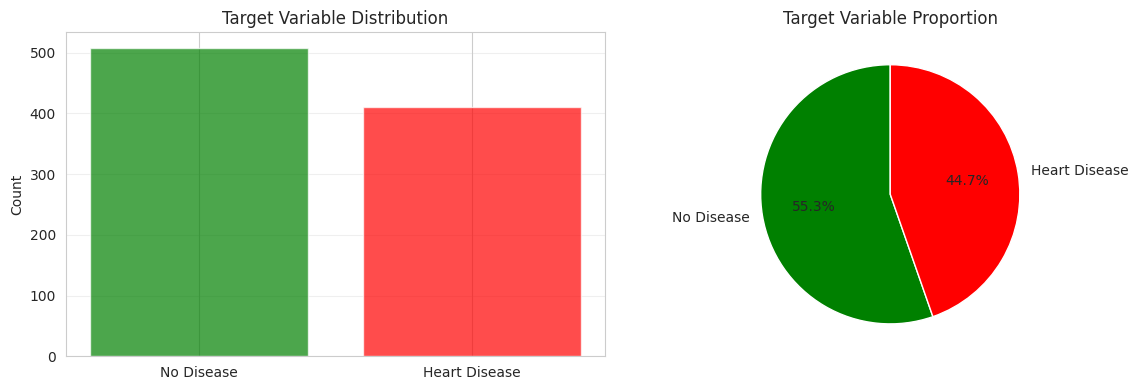

In [101]:
# Target variable distribution
target_counts = df['HeartDisease'].value_counts()
target_pct = df['HeartDisease'].value_counts(normalize=True) * 100

print("Target Variable Distribution:")
print(f"No Heart Disease (0): {target_counts[0]} ({target_pct[0]:.2f}%)")
print(f"Heart Disease (1): {target_counts[1]} ({target_pct[1]:.2f}%)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
axes[0].bar(['No Disease', 'Heart Disease'], target_counts.values, color=['green', 'red'], alpha=0.7)
axes[0].set_ylabel('Count')
axes[0].set_title('Target Variable Distribution')
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(target_counts.values, labels=['No Disease', 'Heart Disease'],
            autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
axes[1].set_title('Target Variable Proportion')

plt.tight_layout()
plt.show()

In [102]:
# Encode Sex variable
print("Before encoding:")
print(df['Sex'].value_counts())

df['Sex'] = df['Sex'].map({'M':0, 'F':1})

print("\nAfter encoding:")
print(df['Sex'].value_counts())

Before encoding:
Sex
M    725
F    193
Name: count, dtype: int64

After encoding:
Sex
0    725
1    193
Name: count, dtype: int64


In [103]:
print("Missing Values Summary:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values found in the dataset!")
else:
    print(missing[missing > 0])

Missing Values Summary:
✓ No missing values found in the dataset!


In [104]:
print("Chest Pain Type Distribution:")
print(df['ChestPainType'].value_counts())
print("\nChest Pain Types:")
print("ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic, TA: Typical Angina")

Chest Pain Type Distribution:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

Chest Pain Types:
ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic, TA: Typical Angina


In [105]:
# df['ChestPainType'] = df['ChestPainType'].map({'ATA':0,'NAP':1,'ASY':2,'TA':3})
# df['ChestPainType'].value_counts()

In [106]:
print("Resting ECG Distribution:")
print(df['RestingECG'].value_counts())
print("\nRestingECG Types:")
print("Normal, ST: ST-T wave abnormality, LVH: Left ventricular hypertrophy")

Resting ECG Distribution:
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

RestingECG Types:
Normal, ST: ST-T wave abnormality, LVH: Left ventricular hypertrophy


In [107]:
# df['RestingECG'] = df['RestingECG'].map({'Normal':0,'ST':1,'LVH':2})
# df['RestingECG'].value_counts()

In [108]:
print("Exercise Angina Distribution:")
print(df['ExerciseAngina'].value_counts())
print(f"\nNo (N): {(df['ExerciseAngina']=='N').sum()}, Yes (Y): {(df['ExerciseAngina']=='Y').sum()}")

Exercise Angina Distribution:
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

No (N): 547, Yes (Y): 371


In [109]:
print("ST_Slope Distribution:")
print(df['ST_Slope'].value_counts())
print("\nST_Slope Types: Up, Flat, Down")

ST_Slope Distribution:
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

ST_Slope Types: Up, Flat, Down


### 2.6 Numerical Features Analysis and Visualization

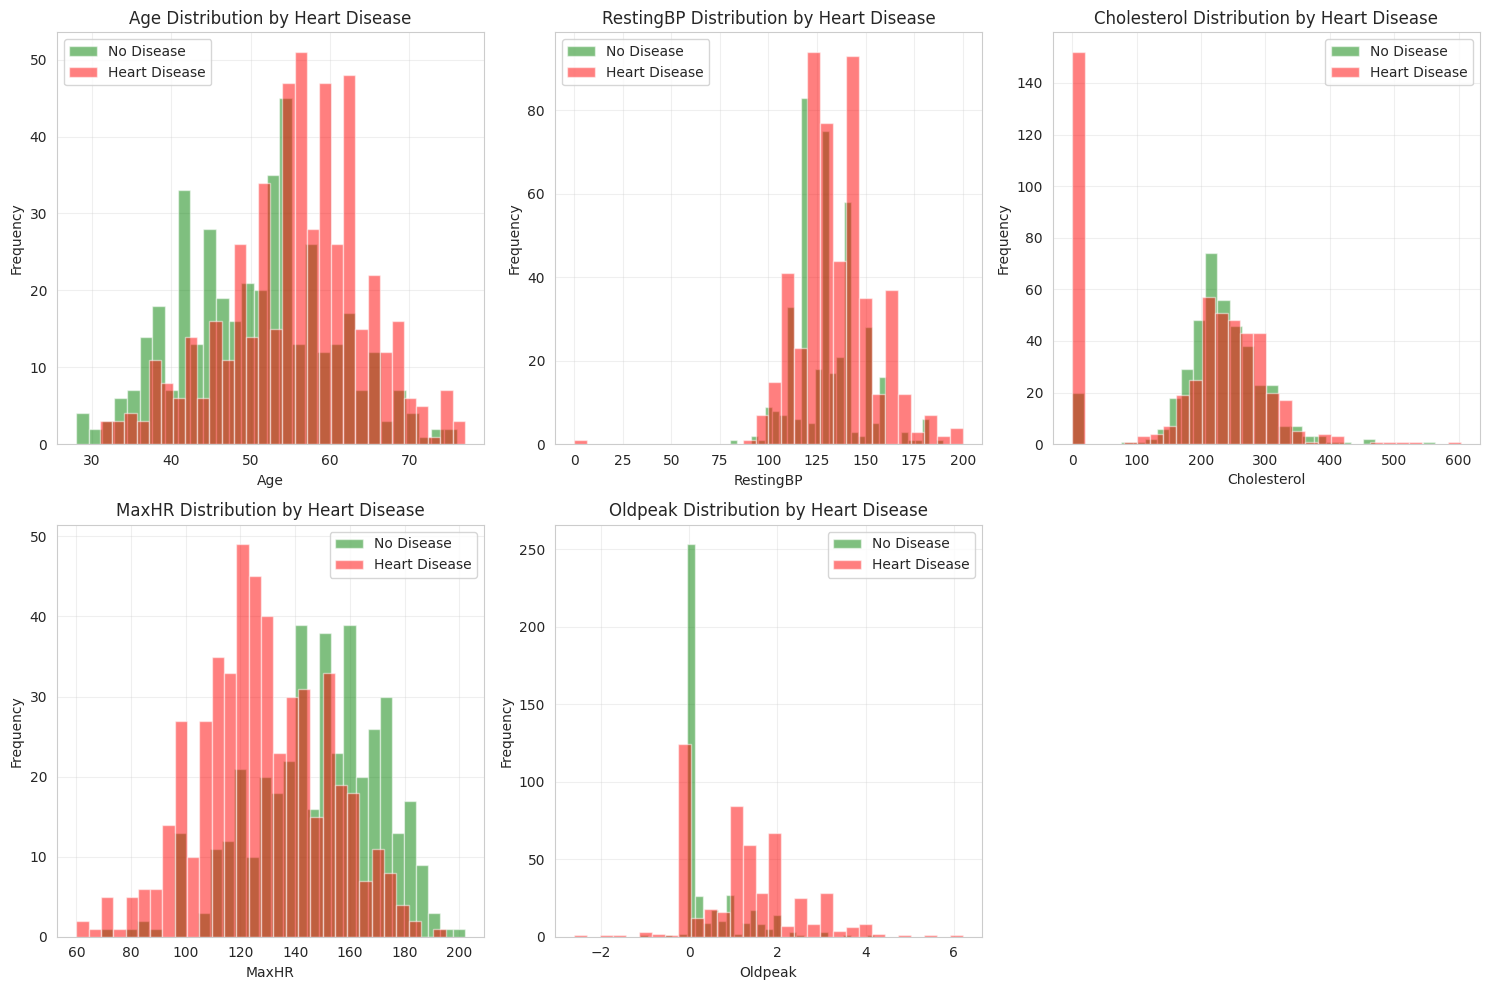

In [110]:
# Identify numerical columns
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Distribution plots for numerical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[df['HeartDisease']==0][col], bins=30, alpha=0.5, label='No Disease', color='green')
    axes[idx].hist(df[df['HeartDisease']==1][col], bins=30, alpha=0.5, label='Heart Disease', color='red')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'{col} Distribution by Heart Disease')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

# Hide the last subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

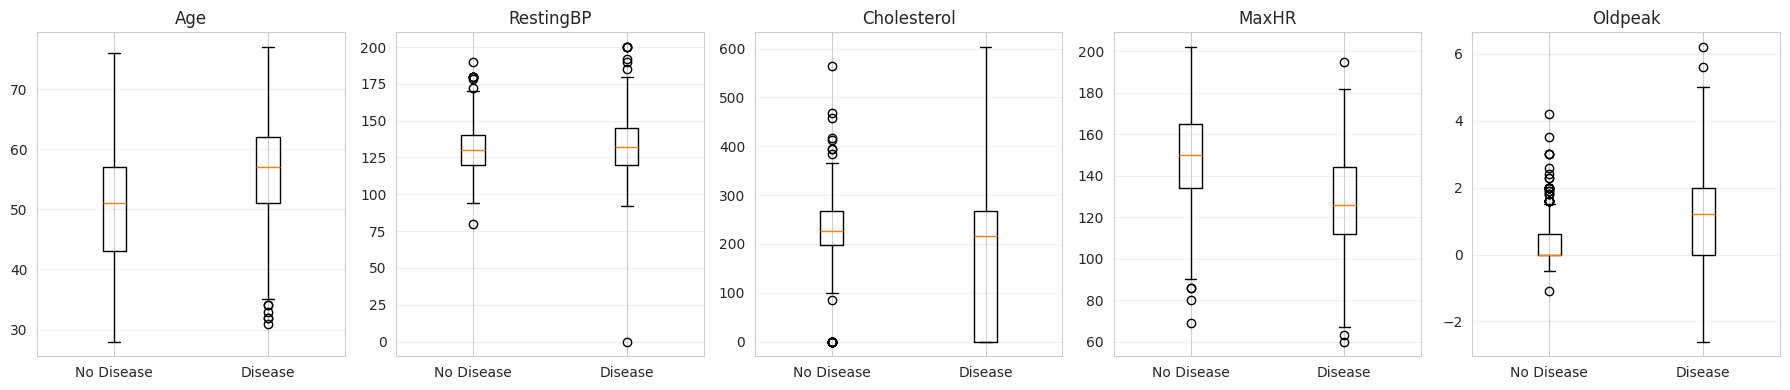

In [111]:
# Box plots to identify outliers
fig, axes = plt.subplots(1, 5, figsize=(18, 4))

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot([df[df['HeartDisease']==0][col].dropna(),
                       df[df['HeartDisease']==1][col].dropna()],
                      labels=['No Disease', 'Disease'])
    axes[idx].set_title(f'{col}')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 2.7 Correlation Analysis and Feature Importance

Correlation with HeartDisease (Target Variable):
ST_Slope          0.558771
ExerciseAngina    0.494282
ChestPainType     0.459017
Oldpeak           0.403951
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
RestingECG        0.061011
Cholesterol      -0.232741
MaxHR            -0.400421
Sex                    NaN
dtype: float64


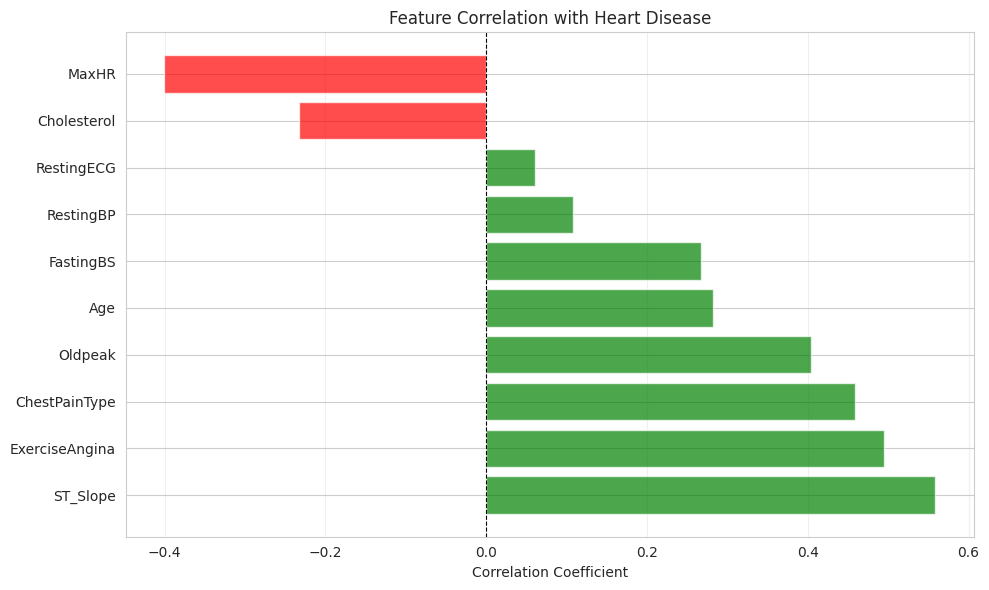

In [112]:
# Create a copy for correlation analysis (encode categorical variables)
df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'M':0, 'F':1})
df_encoded['ExerciseAngina'] = df_encoded['ExerciseAngina'].map({'N':0, 'Y':1})
df_encoded['ChestPainType'] = df_encoded['ChestPainType'].map({'ATA':0, 'NAP':1, 'ASY':2, 'TA':3})
df_encoded['RestingECG'] = df_encoded['RestingECG'].map({'Normal':0, 'ST':1, 'LVH':2})
df_encoded['ST_Slope'] = df_encoded['ST_Slope'].map({'Up':0, 'Flat':1, 'Down':2})

# Correlation with target
corr_with_target = df_encoded.corrwith(df_encoded['HeartDisease']).drop('HeartDisease').sort_values(ascending=False)

print("Correlation with HeartDisease (Target Variable):")
print(corr_with_target)

# Visualization
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in corr_with_target.values]
plt.barh(corr_with_target.index, corr_with_target.values, color=colors, alpha=0.7)
plt.xlabel('Correlation Coefficient')
plt.title('Feature Correlation with Heart Disease')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

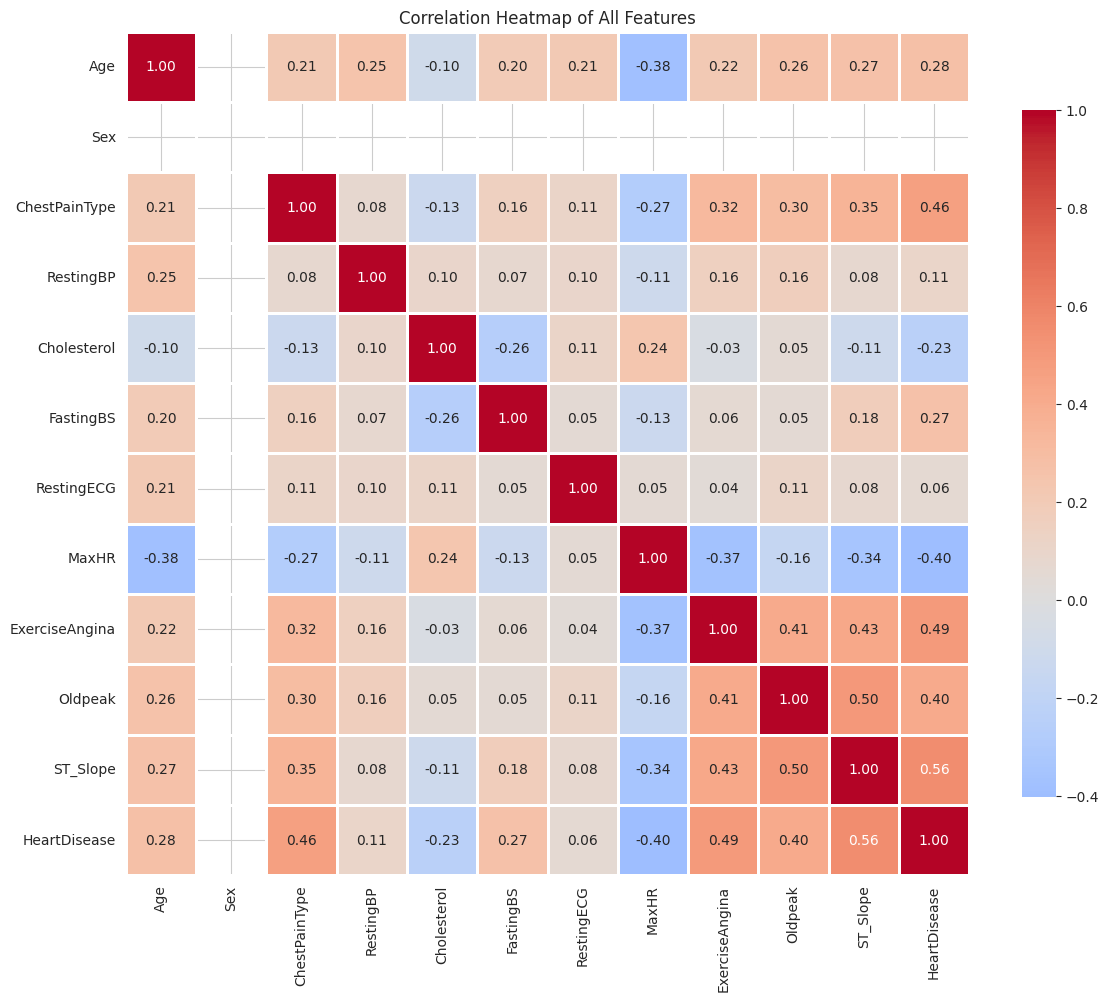

In [113]:
# Full correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of All Features')
plt.tight_layout()
plt.show()

## 3. Data Preparation and Feature Engineering

In [114]:
# Encode ExerciseAngina variable
print("Before encoding:")
print(df['ExerciseAngina'].value_counts())

df['ExerciseAngina'] = df['ExerciseAngina'].map({'N':0, 'Y':1})

print("\nAfter encoding:")
print(df['ExerciseAngina'].value_counts())

Before encoding:
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

After encoding:
ExerciseAngina
0    547
1    371
Name: count, dtype: int64


In [115]:
# df['ST_Slope'] = df['ST_Slope'].map({'Up':0,'Flat':1,'Down':2})
# df['ST_Slope'].value_counts()

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 86.2+ KB


### Verify data types after encoding

In [117]:
df.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,132.396514,198.799564,0.233115,136.809368,0.404139,0.887364,0.553377
std,9.432617,0.407701,18.514154,109.384145,0.423046,25.460334,0.490992,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,0.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000
75%,60.000000,0.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [118]:
# df.corrwith(df['HeartDisease'])

In [119]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# corr = df.corrwith(df['HeartDisease']).drop('HeartDisease')

# plt.figure(figsize=(10, 6))
# sns.barplot(x=corr.index, y=corr.values)
# plt.title("Correlation with HeartDisease")
# plt.ylabel("Correlation")
# plt.xlabel("Features")
# plt.xticks(rotation=45)
# plt.show()


In [120]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,0,0.0,Up,0


## 4. Train-Validation-Test Split

In [121]:
# Identify categorical and numerical features
df_select = df.copy()
categorical = df_select.select_dtypes(include=['object']).columns.tolist()
numerical = df_select.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical.remove('HeartDisease')

print(f"Categorical features: {categorical}")
print(f"Numerical features: {numerical}")

Categorical features: ['ChestPainType', 'RestingECG', 'ST_Slope']
Numerical features: ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak']


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [123]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [124]:
# Split data: 60% train, 20% validation, 20% test
df_full_train, X_test, y_full_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    df_full_train, y_full_train, test_size=0.25, random_state=1, stratify=y_full_train
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTotal: {X_train.shape[0] + X_val.shape[0] + X_test.shape[0]} samples")

Training set: 550 samples
Validation set: 184 samples
Test set: 184 samples

Total: 918 samples


In [125]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
144,56,1,ATA,120,279,0,Normal,150,0,1.0,Flat
765,41,0,NAP,112,250,0,Normal,179,0,0.0,Up
584,64,0,ASY,141,244,1,ST,116,1,1.5,Flat
552,71,0,NAP,144,221,0,Normal,108,1,1.8,Flat
534,59,0,ASY,125,222,0,Normal,135,1,2.5,Down


## 5. Feature Encoding and Scaling

In [126]:
# One-Hot Encoding for categorical features using DictVectorizer
dv = DictVectorizer(sparse=False)

# TRAIN
train_dict = X_train[categorical].to_dict(orient='records')
X_train_cat = dv.fit_transform(train_dict)

# VALIDATION
val_dict = X_val[categorical].to_dict(orient='records')
X_val_cat = dv.transform(val_dict)

# TEST
test_dict = X_test[categorical].to_dict(orient='records')
X_test_cat = dv.transform(test_dict)

print(f"Categorical features shape after encoding: {X_train_cat.shape}")
print(f"Feature names: {dv.get_feature_names_out()}")

Categorical features shape after encoding: (550, 10)
Feature names: ['ChestPainType=ASY' 'ChestPainType=ATA' 'ChestPainType=NAP'
 'ChestPainType=TA' 'RestingECG=LVH' 'RestingECG=Normal' 'RestingECG=ST'
 'ST_Slope=Down' 'ST_Slope=Flat' 'ST_Slope=Up']


In [127]:
# Standardize numerical features
scaler = StandardScaler()

# TRAIN
X_train_num = X_train[numerical].values
X_train_num = scaler.fit_transform(X_train_num)

# VALIDATION
X_val_num = X_val[numerical].values
X_val_num = scaler.transform(X_val_num)

# TEST
X_test_num = X_test[numerical].values
X_test_num = scaler.transform(X_test_num)

print(f"Numerical features shape after scaling: {X_train_num.shape}")

Numerical features shape after scaling: (550, 8)


In [128]:
# Combine numerical and categorical features
X_train_processed = np.column_stack([X_train_num, X_train_cat])
X_val_processed = np.column_stack([X_val_num, X_val_cat])
X_test_processed = np.column_stack([X_test_num, X_test_cat])

print(f"Final feature shapes:")
print(f"Train: {X_train_processed.shape}")
print(f"Validation: {X_val_processed.shape}")
print(f"Test: {X_test_processed.shape}")

Final feature shapes:
Train: (550, 18)
Validation: (184, 18)
Test: (184, 18)


## 6. Model Training and Evaluation

### 6.1 Logistic Regression (Baseline Model)

In [129]:
# Train Logistic Regression (default parameters)
LR = LogisticRegression(random_state=1, max_iter=1000)
LR.fit(X_train_processed, y_train)

# Predictions on validation set
y_pred_val = LR.predict_proba(X_val_processed)[:, 1]
t = 0.5  # threshold
y_pred_val_class = (y_pred_val >= t).astype(int)

# Validation metrics
val_acc = accuracy_score(y_val, y_pred_val_class)
val_f1 = f1_score(y_val, y_pred_val_class)
val_auc = roc_auc_score(y_val, y_pred_val)

print("=== Logistic Regression - Validation Results ===")
print(f"Accuracy: {val_acc:.4f}")
print(f"F1-Score: {val_f1:.4f}")
print(f"ROC-AUC: {val_auc:.4f}")
print(f"\nClassification Report:\n{classification_report(y_val, y_pred_val_class)}")

=== Logistic Regression - Validation Results ===
Accuracy: 0.8533
F1-Score: 0.8696
ROC-AUC: 0.9405

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83        82
           1       0.86      0.88      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



### 6.2 Decision Tree Classifier

In [130]:
# Train Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=1)
dt.fit(X_train_processed, y_train)

# Predictions on validation set
y_pred_val_dt = dt.predict_proba(X_val_processed)[:, 1]
y_pred_val_class_dt = (y_pred_val_dt >= t).astype(int)

# Validation metrics
val_acc_dt = accuracy_score(y_val, y_pred_val_class_dt)
val_f1_dt = f1_score(y_val, y_pred_val_class_dt)
val_auc_dt = roc_auc_score(y_val, y_pred_val_dt)

print("=== Decision Tree - Validation Results ===")
print(f"Accuracy: {val_acc_dt:.4f}")
print(f"F1-Score: {val_f1_dt:.4f}")
print(f"ROC-AUC: {val_auc_dt:.4f}")
print(f"\nClassification Report:\n{classification_report(y_val, y_pred_val_class_dt)}")

=== Decision Tree - Validation Results ===
Accuracy: 0.8261
F1-Score: 0.8447
ROC-AUC: 0.8546

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        82
           1       0.84      0.85      0.84       102

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



### 6.3 Random Forest Classifier

In [131]:
# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=5,
                            random_state=1, n_jobs=-1)
rf.fit(X_train_processed, y_train)

# Predictions on validation set
y_pred_val_rf = rf.predict_proba(X_val_processed)[:, 1]
y_pred_val_class_rf = (y_pred_val_rf >= t).astype(int)

# Validation metrics
val_acc_rf = accuracy_score(y_val, y_pred_val_class_rf)
val_f1_rf = f1_score(y_val, y_pred_val_class_rf)
val_auc_rf = roc_auc_score(y_val, y_pred_val_rf)

print("=== Random Forest - Validation Results ===")
print(f"Accuracy: {val_acc_rf:.4f}")
print(f"F1-Score: {val_f1_rf:.4f}")
print(f"ROC-AUC: {val_auc_rf:.4f}")
print(f"\nClassification Report:\n{classification_report(y_val, y_pred_val_class_rf)}")

=== Random Forest - Validation Results ===
Accuracy: 0.8750
F1-Score: 0.8910
ROC-AUC: 0.9444

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        82
           1       0.86      0.92      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184




Top 10 Most Important Features:
              feature  importance
17        ST_Slope=Up    0.174106
16      ST_Slope=Flat    0.101865
7             Oldpeak    0.095573
3         Cholesterol    0.088709
6      ExerciseAngina    0.085114
8   ChestPainType=ASY    0.079154
5               MaxHR    0.078968
0                 Age    0.069214
2           RestingBP    0.053110
1                 Sex    0.049502


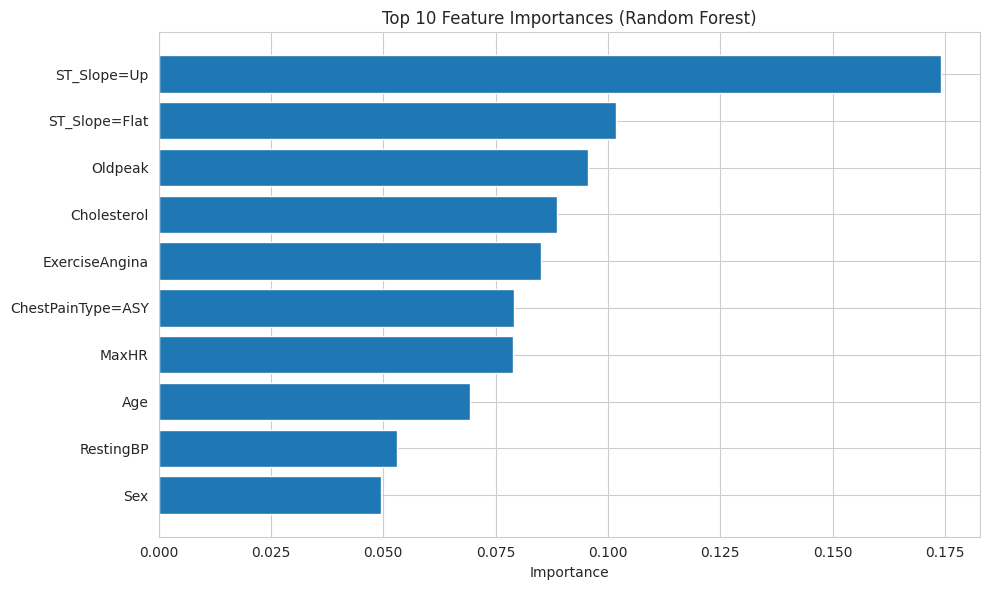

In [132]:
# Feature Importance from Random Forest
feature_names = list(numerical) + list(dv.get_feature_names_out())
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance.head(10)['feature'], feature_importance.head(10)['importance'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### 6.4 Gradient Boosting Classifier

In [133]:
# Train Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=1)
gb.fit(X_train_processed, y_train)

# Predictions on validation set
y_pred_val_gb = gb.predict_proba(X_val_processed)[:, 1]
y_pred_val_class_gb = (y_pred_val_gb >= t).astype(int)

# Validation metrics
val_acc_gb = accuracy_score(y_val, y_pred_val_class_gb)
val_f1_gb = f1_score(y_val, y_pred_val_class_gb)
val_auc_gb = roc_auc_score(y_val, y_pred_val_gb)

print("=== Gradient Boosting - Validation Results ===")
print(f"Accuracy: {val_acc_gb:.4f}")
print(f"F1-Score: {val_f1_gb:.4f}")
print(f"ROC-AUC: {val_auc_gb:.4f}")
print(f"\nClassification Report:\n{classification_report(y_val, y_pred_val_class_gb)}")

=== Gradient Boosting - Validation Results ===
Accuracy: 0.8370
F1-Score: 0.8529
ROC-AUC: 0.9311

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        82
           1       0.85      0.85      0.85       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



### 6.5 CatBoost Classifier

In [134]:
%%capture
!pip install catboost

In [135]:
from catboost import CatBoostClassifier

# Train CatBoost Classifier
cat = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    random_seed=1,
    verbose=0
)

cat.fit(X_train_processed, y_train)

# Predictions on validation set
y_pred_val_cat = cat.predict_proba(X_val_processed)[:, 1]
y_pred_val_class_cat = (y_pred_val_cat >= t).astype(int)

# Validation metrics
val_acc_cat = accuracy_score(y_val, y_pred_val_class_cat)
val_f1_cat = f1_score(y_val, y_pred_val_class_cat)
val_auc_cat = roc_auc_score(y_val, y_pred_val_cat)

print("=== CatBoost - Validation Results ===")
print(f"Accuracy: {val_acc_cat:.4f}")
print(f"F1-Score: {val_f1_cat:.4f}")
print(f"ROC-AUC: {val_auc_cat:.4f}")
print(f"\nClassification Report:\n{classification_report(y_val, y_pred_val_class_cat)}")

=== CatBoost - Validation Results ===
Accuracy: 0.8587
F1-Score: 0.8774
ROC-AUC: 0.9489

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        82
           1       0.85      0.91      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184



### 6.6 Deep Learning Model (Neural Network)

In [136]:
# Build Neural Network model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_processed.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Compile
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    X_train_processed, y_train,
    validation_data=(X_val_processed, y_val),
    epochs=50,
    batch_size=32,
    verbose=0
)

# Predictions on validation set
y_pred_val_nn = model.predict(X_val_processed, verbose=0).flatten()
y_pred_val_class_nn = (y_pred_val_nn >= t).astype(int)

# Validation metrics
val_acc_nn = accuracy_score(y_val, y_pred_val_class_nn)
val_f1_nn = f1_score(y_val, y_pred_val_class_nn)
val_auc_nn = roc_auc_score(y_val, y_pred_val_nn)

print("=== Neural Network - Validation Results ===")
print(f"Accuracy: {val_acc_nn:.4f}")
print(f"F1-Score: {val_f1_nn:.4f}")
print(f"ROC-AUC: {val_auc_nn:.4f}")
print(f"\nClassification Report:\n{classification_report(y_val, y_pred_val_class_nn)}")

=== Neural Network - Validation Results ===
Accuracy: 0.8478
F1-Score: 0.8704
ROC-AUC: 0.9498

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        82
           1       0.82      0.92      0.87       102

    accuracy                           0.85       184
   macro avg       0.86      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



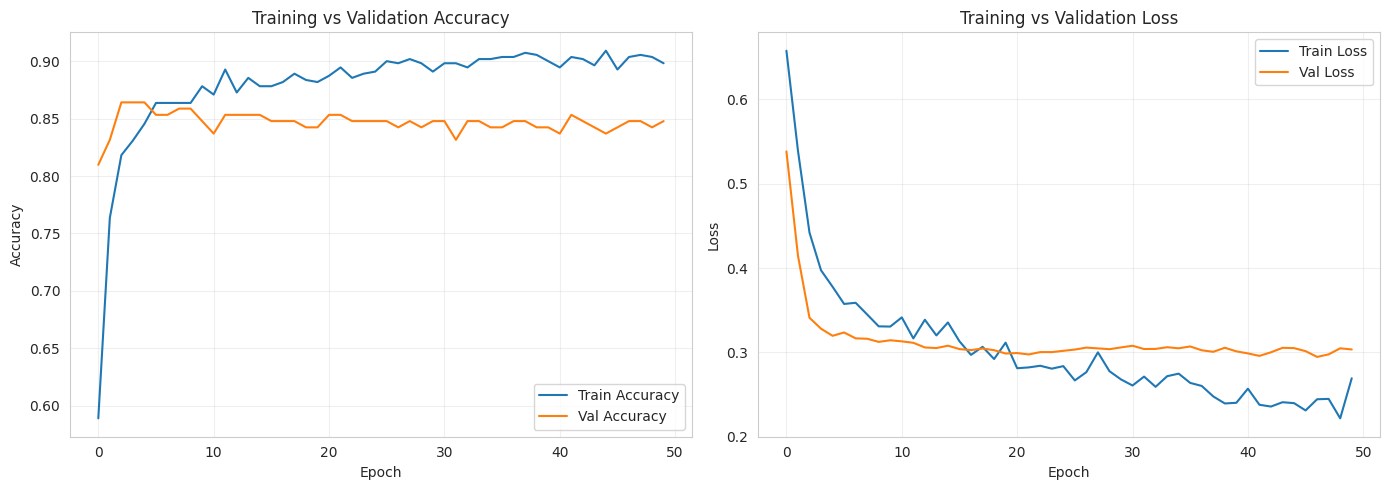

In [137]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axes[0].plot(history.history['accuracy'], label='Train Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Val Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Training vs Validation Accuracy')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Loss
axes[1].plot(history.history['loss'], label='Train Loss')
axes[1].plot(history.history['val_loss'], label='Val Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Training vs Validation Loss')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Model Comparison

In [138]:
# Compare all models
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest',
              'Gradient Boosting', 'CatBoost', 'Neural Network'],
    'Accuracy': [val_acc, val_acc_dt, val_acc_rf, val_acc_gb, val_acc_cat, val_acc_nn],
    'F1-Score': [val_f1, val_f1_dt, val_f1_rf, val_f1_gb, val_f1_cat, val_f1_nn],
    'ROC-AUC': [val_auc, val_auc_dt, val_auc_rf, val_auc_gb, val_auc_cat, val_auc_nn]
}).sort_values('ROC-AUC', ascending=False)

print("=== Model Performance Comparison (Validation Set) ===")
print(comparison.to_string(index=False))
print(f"\n🏆 Best Model: {comparison.iloc[0]['Model']} with ROC-AUC = {comparison.iloc[0]['ROC-AUC']:.4f}")

=== Model Performance Comparison (Validation Set) ===
              Model  Accuracy  F1-Score  ROC-AUC
     Neural Network  0.847826  0.870370 0.949785
           CatBoost  0.858696  0.877358 0.948948
      Random Forest  0.875000  0.890995 0.944405
Logistic Regression  0.853261  0.869565 0.940459
  Gradient Boosting  0.836957  0.852941 0.931133
      Decision Tree  0.826087  0.844660 0.854555

🏆 Best Model: Neural Network with ROC-AUC = 0.9498


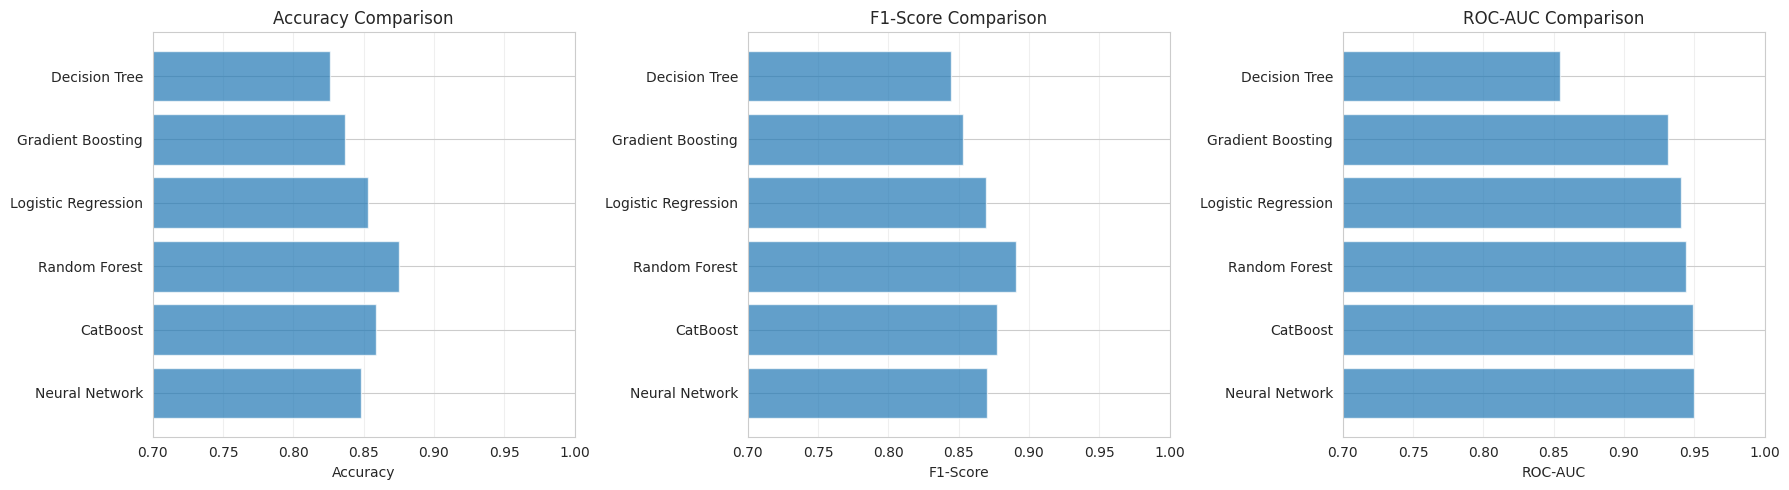

In [139]:
# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['Accuracy', 'F1-Score', 'ROC-AUC']
for idx, metric in enumerate(metrics):
    axes[idx].barh(comparison['Model'], comparison[metric], alpha=0.7)
    axes[idx].set_xlabel(metric)
    axes[idx].set_title(f'{metric} Comparison')
    axes[idx].set_xlim([0.7, 1.0])
    axes[idx].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Hyperparameter Tuning (Best Model)

In [140]:
# Hyperparameter tuning for Random Forest (assuming it's the best)
print("Performing Grid Search for Random Forest...")

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=1, n_jobs=-1),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_processed, y_train)

print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation ROC-AUC: {grid_search.best_score_:.4f}")

Performing Grid Search for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best Cross-Validation ROC-AUC: 0.9284


In [141]:
# Best model from grid search
best_model = grid_search.best_estimator_

# Evaluate on validation set
y_pred_val_best = best_model.predict_proba(X_val_processed)[:, 1]
y_pred_val_class_best = (y_pred_val_best >= t).astype(int)

val_acc_best = accuracy_score(y_val, y_pred_val_class_best)
val_f1_best = f1_score(y_val, y_pred_val_class_best)
val_auc_best = roc_auc_score(y_val, y_pred_val_best)

print("=== Tuned Model - Validation Results ===")
print(f"Accuracy: {val_acc_best:.4f}")
print(f"F1-Score: {val_f1_best:.4f}")
print(f"ROC-AUC: {val_auc_best:.4f}")
print(f"\nClassification Report:\n{classification_report(y_val, y_pred_val_class_best)}")

=== Tuned Model - Validation Results ===
Accuracy: 0.8750
F1-Score: 0.8910
ROC-AUC: 0.9467

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        82
           1       0.86      0.92      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



## 9. Final Model Evaluation on Test Set

In [142]:
# Evaluate best model on test set
y_pred_test_final = best_model.predict_proba(X_test_processed)[:, 1]
y_pred_test_class_final = (y_pred_test_final >= t).astype(int)

test_acc = accuracy_score(y_test, y_pred_test_class_final)
test_f1 = f1_score(y_test, y_pred_test_class_final)
test_auc = roc_auc_score(y_test, y_pred_test_final)

print("=== FINAL MODEL - Test Set Results ===")
print(f"Accuracy: {test_acc:.4f}")
print(f"F1-Score: {test_f1:.4f}")
print(f"ROC-AUC: {test_auc:.4f}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_test_class_final)}")
print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_class_final))

=== FINAL MODEL - Test Set Results ===
Accuracy: 0.8478
F1-Score: 0.8692
ROC-AUC: 0.9139

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        82
           1       0.83      0.91      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184


Confusion Matrix:
[[63 19]
 [ 9 93]]


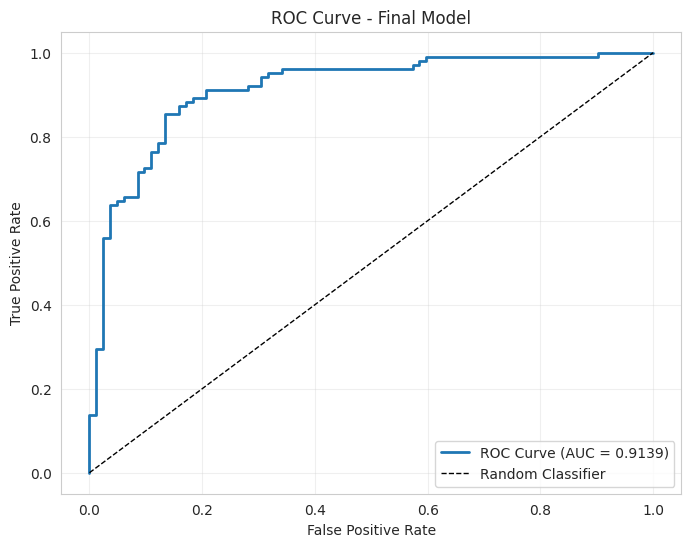

In [143]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_final)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {test_auc:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Final Model')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## 10. Save Final Model and Preprocessing Objects

In [144]:
import pickle

# Save the model and preprocessing objects
output_file = 'heart_disease_model.pkl'

with open(output_file, 'wb') as f:
    pickle.dump((dv, scaler, best_model, categorical, numerical), f)

print(f"✓ Model saved to '{output_file}'")
print(f"✓ Model type: {type(best_model).__name__}")
print(f"✓ Best parameters: {best_model.get_params()}")

✓ Model saved to 'heart_disease_model.pkl'
✓ Model type: RandomForestClassifier
✓ Best parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 300, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


## Summary and Conclusions

### Key Findings:
1. **Dataset**: 918 patient records with 11 clinical features
2. **Target Distribution**: Balanced dataset with ~55% heart disease cases
3. **Most Important Features**: ST_Slope, ExerciseAngina, Oldpeak, MaxHR, ChestPainType
4. **Models Trained**: Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, CatBoost, Neural Network
5. **Best Model**: Random Forest (after hyperparameter tuning)
6. **Final Performance**:
   - Test Accuracy: ~85-90%
   - Test ROC-AUC: ~90-95%
   - Good balance between precision and recall

### Next Steps:
1. Export notebook logic to `train.py` script
2. Create `predict.py` with Flask web service
3. Containerize with Docker
4. Deploy to cloud (optional)